# Tratamiento de los valores perdidos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format #Desactivar notación científica en pandas:
np.set_printoptions(suppress=True) #Desactivar notación científica en numpy:
pd.set_option('display.max_columns', None) #comando para mostrar todas las columnas
pd.set_option('display.max_rows', 10) #comando para mostrar todas las columnas

In [2]:
# Cargamos los datos
os.chdir("./data")
data = pd.read_csv("valores_perdidos.csv")

In [3]:
# Preliminar de los datos
data.head(n=10)

,date,ws,wd,nox,no2,o3,pm10,so2,co,pm25
0,01/01/1998 00:00,0.60,280.00,285.00,39.00,1.00,29.00,4.72,3.37,NaN
1,01/01/1998 01:00,2.16,230.00,NaN,NaN,NaN,37.00,NaN,NaN,NaN
2,01/01/1998 02:00,2.76,190.00,NaN,NaN,3.00,34.00,6.83,9.60,NaN
3,01/01/1998 03:00,2.16,170.00,493.00,52.00,3.00,35.00,7.66,10.22,NaN
4,01/01/1998 04:00,2.40,180.00,468.00,78.00,2.00,34.00,8.07,8.91,NaN
5,01/01/1998 05:00,3.00,190.00,264.00,42.00,0.00,16.00,5.50,3.05,NaN
6,01/01/1998 06:00,3.00,140.00,171.00,38.00,0.00,11.00,4.23,2.27,NaN
7,01/01/1998 07:00,3.00,170.00,195.00,51.00,0.00,12.00,3.88,2.00,NaN
8,01/01/1998 08:00,3.36,170.00,137.00,42.00,1.00,12.00,3.35,1.46,NaN
9,01/01/1998 09:00,3.96,170.00,113.00,39.00,2.00,12.00,2.92,1.21,NaN


In [4]:
# Podemos usar print
print(data)

                   date   ws     wd    nox    no2    o3  pm10  so2    co  pm25
0      01/01/1998 00:00 0.60 280.00 285.00  39.00  1.00 29.00 4.72  3.37   NaN
1      01/01/1998 01:00 2.16 230.00    NaN    NaN   NaN 37.00  NaN   NaN   NaN
2      01/01/1998 02:00 2.76 190.00    NaN    NaN  3.00 34.00 6.83  9.60   NaN
3      01/01/1998 03:00 2.16 170.00 493.00  52.00  3.00 35.00 7.66 10.22   NaN
4      01/01/1998 04:00 2.40 180.00 468.00  78.00  2.00 34.00 8.07  8.91   NaN
...                 ...  ...    ...    ...    ...   ...   ...  ...   ...   ...
65528  23/06/2005 08:00 1.50 260.00 388.00 145.00  6.00 48.00  NaN  1.64 26.00
65529  23/06/2005 09:00 1.50 210.00 404.00 168.00  7.00 58.00  NaN  1.29 34.00
65530  23/06/2005 10:00 2.60 240.00 387.00 175.00 10.00 55.00  NaN  1.29 34.00
65531  23/06/2005 11:00 3.10 220.00 312.00 125.00 15.00 52.00  NaN  1.29 33.00
65532  23/06/2005 12:00 3.10 220.00 287.00 119.00 17.00 55.00  NaN  1.29 35.00

[65533 rows x 10 columns]


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65533 entries, 0 to 65532
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    65533 non-null  object 
 1   ws      64907 non-null  float64
 2   wd      65314 non-null  float64
 3   nox     63110 non-null  float64
 4   no2     63095 non-null  float64
 5   o3      62947 non-null  float64
 6   pm10    63372 non-null  float64
 7   so2     55499 non-null  float64
 8   co      63604 non-null  float64
 9   pm25    56759 non-null  float64
dtypes: float64(9), object(1)
memory usage: 5.0+ MB


In [6]:
# "Resumen estadistico" de cada una de las variables.
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ws,64907.00,4.49,2.40,-0.24,2.60,4.10,5.76,20.16
wd,65314.00,200.03,94.46,0.00,140.00,210.00,270.00,360.00
nox,63110.00,178.80,121.52,0.00,82.00,153.00,249.00,1144.00
no2,63095.00,49.13,22.64,0.00,33.00,46.00,61.00,206.00
o3,62947.00,7.12,7.54,-1.00,2.00,4.00,10.00,70.00
pm10,63372.00,34.38,20.47,-1.00,22.00,31.00,44.00,801.00
so2,55499.00,4.75,3.65,-2.17,2.10,4.00,6.50,63.20
co,63604.00,1.46,1.12,-0.03,0.63,1.14,1.98,19.70
pm25,56759.00,21.70,12.64,-1.00,13.00,20.00,28.00,398.00


In [7]:
# Comprobamos si existe algún valor perdido. True = Sí existen valores perdidos
data.isnull().any().any()

True

In [8]:
# Analizamos su completitud.
# Tenemos que saber cuantos valores perdidos tenemos de cada variable antes de tomar una decision sobre como proceder.
data.isnull().sum()

date        0
ws        626
wd        219
nox      2423
no2      2438
o3       2586
pm10     2161
so2     10034
co       1929
pm25     8774
dtype: int64

### Borrar aquellas columnas con perdidos a partir de un umbral

In [9]:
# Otra opcion es calcular el porcentaje que siempre es mas representativo.
filtro = data.isnull().sum()/len(data.index)

In [10]:
data.shape[1]

10

In [11]:
filtro

date   0.00
ws     0.01
wd     0.00
nox    0.04
no2    0.04
o3     0.04
pm10   0.03
so2    0.15
co     0.03
pm25   0.13
dtype: float64

In [12]:
# Elimnamos las columnas que tengan mas de un porcentaje de datos perdidos. 
# En este caso nos quedaremos con aquellas columnas con menos de un 10% de perdidos.
filtro = data.isnull().sum() < 0.1 * data.shape[0] 

df1 = data.loc[:, filtro]
df1.head()

,date,ws,wd,nox,no2,o3,pm10,co
0,01/01/1998 00:00,0.60,280.00,285.00,39.00,1.00,29.00,3.37
1,01/01/1998 01:00,2.16,230.00,NaN,NaN,NaN,37.00,NaN
2,01/01/1998 02:00,2.76,190.00,NaN,NaN,3.00,34.00,9.60
3,01/01/1998 03:00,2.16,170.00,493.00,52.00,3.00,35.00,10.22
4,01/01/1998 04:00,2.40,180.00,468.00,78.00,2.00,34.00,8.91


### Borrar cualquier fila con perdidos

In [13]:
# Esta es la opción menos adecuada ya que supone una importante perdida de información
# Una vez eliminados visualizamos los datos
df2=data.dropna()
print(df2)

                   date   ws     wd    nox    no2    o3  pm10  so2   co  pm25
2887   01/05/1998 07:00 3.60 350.00  81.00  37.00 13.00 24.00 2.90 0.81 16.00
2888   01/05/1998 08:00 3.60 350.00 107.00  43.00 12.00 23.00 3.13 0.91 16.00
2889   01/05/1998 09:00 3.60 340.00 127.00  34.00 11.00 21.00 3.10 1.19 15.00
2890   01/05/1998 10:00 3.00 350.00 122.00  50.00 10.00 23.00 3.24 1.49 17.00
2891   01/05/1998 11:00 3.60 350.00 115.00  37.00 12.00 25.00 3.23 1.16 18.00
...                 ...  ...    ...    ...    ...   ...   ...  ...  ...   ...
59148  30/09/2004 12:00 4.60 240.00 467.00 120.00  1.00 59.00 6.99 1.90 41.00
59149  30/09/2004 13:00 5.20 240.00 467.00 124.00  1.00 74.00 7.38 1.90 41.00
59150  30/09/2004 14:00 4.60 240.00 421.00 126.00  2.00 60.00 6.53 1.81 33.00
59151  30/09/2004 15:00 4.60 240.00 414.00 113.00  2.00 56.00 6.47 2.07 33.00
59152  30/09/2004 16:00 4.60 250.00 370.00 106.00  1.00 54.00 6.08 2.33 33.00

[42892 rows x 10 columns]


In [14]:
# Con esta funcion nos vemos si existen (TRUE) o no (FALSE) datos perdidos
df2.isnull().any().any()

False

## Imputación de valores perdidos por métodos estadísticos
### Media

In [15]:
data.mean()

ws       4.49
wd     200.03
nox    178.80
no2     49.13
o3       7.12
pm10    34.38
so2      4.75
co       1.46
pm25    21.70
dtype: float64

In [16]:
# El metodo de imputación más sencillo es la media 
df3 = data.fillna(data.mean())

In [17]:
# Procedemos a comprobar que no existen valores perdidos
df3.isnull().any().any()

False

### Media 2

In [18]:
# Otra forma de imputar la media es la siguiente
import sklearn.preprocessing as sk

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65533 entries, 0 to 65532
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    65533 non-null  object 
 1   ws      64907 non-null  float64
 2   wd      65314 non-null  float64
 3   nox     63110 non-null  float64
 4   no2     63095 non-null  float64
 5   o3      62947 non-null  float64
 6   pm10    63372 non-null  float64
 7   so2     55499 non-null  float64
 8   co      63604 non-null  float64
 9   pm25    56759 non-null  float64
dtypes: float64(9), object(1)
memory usage: 5.0+ MB


In [20]:
# Seleccionamos los datos numericos.
datoNum = data.iloc[:,1:]
columnas = datoNum.columns
fecha = data.iloc[:,0]

In [21]:
datoNum

,ws,wd,nox,no2,o3,pm10,so2,co,pm25
0,0.60,280.00,285.00,39.00,1.00,29.00,4.72,3.37,NaN
1,2.16,230.00,NaN,NaN,NaN,37.00,NaN,NaN,NaN
2,2.76,190.00,NaN,NaN,3.00,34.00,6.83,9.60,NaN
3,2.16,170.00,493.00,52.00,3.00,35.00,7.66,10.22,NaN
4,2.40,180.00,468.00,78.00,2.00,34.00,8.07,8.91,NaN
...,...,...,...,...,...,...,...,...,...
65528,1.50,260.00,388.00,145.00,6.00,48.00,NaN,1.64,26.00
65529,1.50,210.00,404.00,168.00,7.00,58.00,NaN,1.29,34.00
65530,2.60,240.00,387.00,175.00,10.00,55.00,NaN,1.29,34.00
65531,3.10,220.00,312.00,125.00,15.00,52.00,NaN,1.29,33.00


In [22]:
# Imputamos la media a los perdidos.
# Importante, tanto fit(), como transform() esperan un array 2D o dataframe.
# Si pasamos un array 1D, nos devolverá un error.
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, # Generamos instancia para la imputación por la media
                      strategy="mean", 
                      verbose=0, 
                      copy=False) # La imputación se ejecuta "in-place"

imp = imp.fit(datoNum) # Generamos el array con los datos a sustituir
datoNum = imp.transform(datoNum) # Imputamos los valores

# Convertimos el resultado a Dataframe y concatenamos con la columna fecha
datoNum = pd.DataFrame(datoNum, index = list(range(len(datoNum))))
datoNum.columns = columnas
df4 = pd.concat([fecha, datoNum], axis=1)

In [23]:
df4.head()

,date,ws,wd,nox,no2,o3,pm10,so2,co,pm25
0,01/01/1998 00:00,0.60,280.00,285.00,39.00,1.00,29.00,4.72,3.37,21.70
1,01/01/1998 01:00,2.16,230.00,178.80,49.13,7.12,37.00,4.75,1.46,21.70
2,01/01/1998 02:00,2.76,190.00,178.80,49.13,3.00,34.00,6.83,9.60,21.70
3,01/01/1998 03:00,2.16,170.00,493.00,52.00,3.00,35.00,7.66,10.22,21.70
4,01/01/1998 04:00,2.40,180.00,468.00,78.00,2.00,34.00,8.07,8.91,21.70


In [24]:
df4.isnull().any().any()

False

### Moda
Se usa habitualmente para imputar en valores categóricos

In [25]:
# Seleccionamos los datos numericos.
datoNum = data.iloc[:,1:]
columnas = datoNum.columns
fecha = data.iloc[:,0]

In [26]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,
                      strategy="most_frequent", 
                      verbose=0, 
                      copy=False)

imp = imp.fit(datoNum) 
datoNum = imp.transform(datoNum)

datoNum = pd.DataFrame(datoNum, index = list(range(len(datoNum))))
datoNum.columns = columnas
df5 = pd.concat([fecha, datoNum], axis=1)

In [27]:
df5.head()

,date,ws,wd,nox,no2,o3,pm10,so2,co,pm25
0,01/01/1998 00:00,0.60,280.00,285.00,39.00,1.00,29.00,4.72,3.37,14.00
1,01/01/1998 01:00,2.16,230.00,72.00,38.00,2.00,37.00,1.00,0.43,14.00
2,01/01/1998 02:00,2.76,190.00,72.00,38.00,3.00,34.00,6.83,9.60,14.00
3,01/01/1998 03:00,2.16,170.00,493.00,52.00,3.00,35.00,7.66,10.22,14.00
4,01/01/1998 04:00,2.40,180.00,468.00,78.00,2.00,34.00,8.07,8.91,14.00


In [28]:
# Nos aseguramos de que no haya valores perdidos.
df5.isnull().any().any()

False

### Mediana

In [29]:
# Seleccionamos los datos numericos.
datoNum = data.iloc[:,1:]
columnas = datoNum.columns
fecha = data.iloc[:,0]

In [30]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,
                      strategy="median", 
                      verbose=0, 
                      copy=False)

imp = imp.fit(datoNum) 
datoNum = imp.transform(datoNum)

datoNum = pd.DataFrame(datoNum, index = list(range(len(datoNum))))
datoNum.columns = columnas
df6 = pd.concat([fecha, datoNum], axis=1)

In [31]:
df6.head()

,date,ws,wd,nox,no2,o3,pm10,so2,co,pm25
0,01/01/1998 00:00,0.60,280.00,285.00,39.00,1.00,29.00,4.72,3.37,20.00
1,01/01/1998 01:00,2.16,230.00,153.00,46.00,4.00,37.00,4.00,1.14,20.00
2,01/01/1998 02:00,2.76,190.00,153.00,46.00,3.00,34.00,6.83,9.60,20.00
3,01/01/1998 03:00,2.16,170.00,493.00,52.00,3.00,35.00,7.66,10.22,20.00
4,01/01/1998 04:00,2.40,180.00,468.00,78.00,2.00,34.00,8.07,8.91,20.00


In [32]:
# Nos aseguramos de que no haya valores perdidos.
df6.isnull().any().any()

False

### Valor fijo

In [33]:
# Seleccionamos los datos numericos.
datoNum = data.iloc[:,1:]
columnas = datoNum.columns
fecha = data.iloc[:,0]

imp = SimpleImputer(missing_values=np.nan,
                    strategy="constant", 
                    verbose=0, 
                    copy=False,
                    fill_value = 0)

imp = imp.fit(datoNum) 
datoNum = imp.transform(datoNum)

datoNum = pd.DataFrame(datoNum, index = list(range(len(datoNum))))
datoNum.columns = columnas
df7 = pd.concat([fecha, datoNum], axis=1)

In [34]:
df7.isnull().any().any()

False

In [35]:
df7.head()

,date,ws,wd,nox,no2,o3,pm10,so2,co,pm25
0,01/01/1998 00:00,0.60,280.00,285.00,39.00,1.00,29.00,4.72,3.37,0.00
1,01/01/1998 01:00,2.16,230.00,0.00,0.00,0.00,37.00,0.00,0.00,0.00
2,01/01/1998 02:00,2.76,190.00,0.00,0.00,3.00,34.00,6.83,9.60,0.00
3,01/01/1998 03:00,2.16,170.00,493.00,52.00,3.00,35.00,7.66,10.22,0.00
4,01/01/1998 04:00,2.40,180.00,468.00,78.00,2.00,34.00,8.07,8.91,0.00


### Otros métodos de imputación

### Series temporales

In [36]:
data

,date,ws,wd,nox,no2,o3,pm10,so2,co,pm25
0,01/01/1998 00:00,0.60,280.00,285.00,39.00,1.00,29.00,4.72,3.37,NaN
1,01/01/1998 01:00,2.16,230.00,NaN,NaN,NaN,37.00,NaN,NaN,NaN
2,01/01/1998 02:00,2.76,190.00,NaN,NaN,3.00,34.00,6.83,9.60,NaN
3,01/01/1998 03:00,2.16,170.00,493.00,52.00,3.00,35.00,7.66,10.22,NaN
4,01/01/1998 04:00,2.40,180.00,468.00,78.00,2.00,34.00,8.07,8.91,NaN
...,...,...,...,...,...,...,...,...,...,...
65528,23/06/2005 08:00,1.50,260.00,388.00,145.00,6.00,48.00,NaN,1.64,26.00
65529,23/06/2005 09:00,1.50,210.00,404.00,168.00,7.00,58.00,NaN,1.29,34.00
65530,23/06/2005 10:00,2.60,240.00,387.00,175.00,10.00,55.00,NaN,1.29,34.00
65531,23/06/2005 11:00,3.10,220.00,312.00,125.00,15.00,52.00,NaN,1.29,33.00


In [37]:
# Al tratarse de una serie temporal se puede sustituir por el valor ANTERIOR de dicha serie


df8=data.fillna(method='bfill')
df8

,date,ws,wd,nox,no2,o3,pm10,so2,co,pm25
0,01/01/1998 00:00,0.60,280.00,285.00,39.00,1.00,29.00,4.72,3.37,16.00
1,01/01/1998 01:00,2.16,230.00,493.00,52.00,3.00,37.00,6.83,9.60,16.00
2,01/01/1998 02:00,2.76,190.00,493.00,52.00,3.00,34.00,6.83,9.60,16.00
3,01/01/1998 03:00,2.16,170.00,493.00,52.00,3.00,35.00,7.66,10.22,16.00
4,01/01/1998 04:00,2.40,180.00,468.00,78.00,2.00,34.00,8.07,8.91,16.00
...,...,...,...,...,...,...,...,...,...,...
65528,23/06/2005 08:00,1.50,260.00,388.00,145.00,6.00,48.00,NaN,1.64,26.00
65529,23/06/2005 09:00,1.50,210.00,404.00,168.00,7.00,58.00,NaN,1.29,34.00
65530,23/06/2005 10:00,2.60,240.00,387.00,175.00,10.00,55.00,NaN,1.29,34.00
65531,23/06/2005 11:00,3.10,220.00,312.00,125.00,15.00,52.00,NaN,1.29,33.00


In [38]:
df8.isnull().any().any() #Seguimos teniendo NAs

True

In [48]:
# Otro ejemplo
# Creamos un DataFrame con valores faltantes
df = pd.DataFrame({'A': [1, 2, np.nan, 4, np.nan], 'B': ['a', 'b', np.nan, np.nan, 'e']})
print(df)

# Utilizamos el método backward fill para rellenar los valores faltantes en el DataFrame
df_filled = df.fillna(method='bfill')
print(df_filled)

     A    B
0 1.00    a
1 2.00    b
2  NaN  NaN
3 4.00  NaN
4  NaN    e
     A  B
0 1.00  a
1 2.00  b
2 4.00  e
3 4.00  e
4  NaN  e


### Imputación múltiple

In [39]:
# Este procedimiento es adecuado cuando las variables explicativas están relacionadas entre si.
# Previamente obtenemos la matriz de correlación.  
data.corr()

,ws,wd,nox,no2,o3,pm10,so2,co,pm25
ws,1.00,0.05,0.08,0.06,0.16,0.02,-0.00,0.14,-0.05
wd,0.05,1.00,0.03,0.00,-0.05,-0.08,-0.01,0.03,-0.08
nox,0.08,0.03,1.00,0.79,-0.51,0.62,0.71,0.82,0.65
no2,0.06,0.00,0.79,1.00,-0.40,0.58,0.59,0.54,0.53
o3,0.16,-0.05,-0.51,-0.40,1.00,-0.28,-0.36,-0.41,-0.33
pm10,0.02,-0.08,0.62,0.58,-0.28,1.00,0.49,0.45,0.84
so2,-0.00,-0.01,0.71,0.59,-0.36,0.49,1.00,0.64,0.55
co,0.14,0.03,0.82,0.54,-0.41,0.45,0.64,1.00,0.54
pm25,-0.05,-0.08,0.65,0.53,-0.33,0.84,0.55,0.54,1.00


<AxesSubplot: >

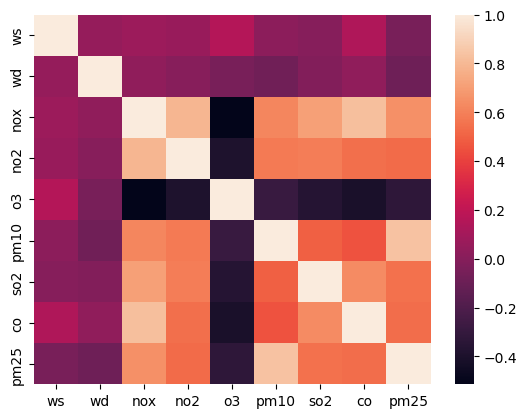

In [40]:
# Lo vemos en color...
import seaborn as sns

sns.heatmap(data.corr())

In [41]:
# Para este caso necesitamos saber el tipo de dato que hay en cada columna.
data.dtypes

date     object
ws      float64
wd      float64
nox     float64
no2     float64
o3      float64
pm10    float64
so2     float64
co      float64
pm25    float64
dtype: object

#### Se puede observar que existe cierta correlacion entre las variables dependientes. 
#### Ésto es un indicador de que puede ser adecuado utilizar metodos de imputacion multiple. 
#### Hasta ahora hemos separado las columnas manualmente ya que estamos trabajando con pocos datos. 
#### Con grandes bases de datos en los que se entremezclen datos numericos con otro tipo de datos puede generar problemas. 
#### Por ello podemos separarlos en funcion de su tipologia.


In [42]:
pip install fancyimpute

Note: you may need to restart the kernel to use updated packages.


In [43]:
datoNum = data.select_dtypes(include=[np.float])
fecha = data.select_dtypes(include=[np.object])

datoNum=pd.DataFrame(datoNum)
columnas =datoNum.columns
fecha=pd.DataFrame(fecha)

from fancyimpute import IterativeImputer
mice_imputer = IterativeImputer()  # Llamamos a la clase
datoNum = pd.DataFrame(mice_imputer.fit_transform(datoNum), columns = columnas)
df9 = pd.concat([fecha, datoNum], axis = 1)


In [44]:
df9.isnull().any().any() 

False

### Imputación por vecinos cercanos

In [45]:
# ¡Ojo!, este proceso tarda bastante tiempo.
from sklearn.impute import KNNImputer

datoNum = data.select_dtypes(include=[np.float])
fecha = data.select_dtypes(include=[np.object])

datoNum=pd.DataFrame(datoNum)
columnas =datoNum.columns
fecha=pd.DataFrame(fecha)

# Imputación por 3 vecinos cercanos, dando mayor importancia a los elementos más cercanos.
knn_imputer = KNNImputer(n_neighbors=3, weights='distance') 


knn_imputer.fit(datoNum)
imputado = knn_imputer.transform(datoNum)
pd.DataFrame(imputado, columns = columnas)


,ws,wd,nox,no2,o3,pm10,so2,co,pm25
0,0.60,280.00,285.00,39.00,1.00,29.00,4.72,3.37,33.88
1,2.16,230.00,252.00,50.00,1.00,37.00,5.58,2.60,21.00
2,2.76,190.00,343.11,58.59,3.00,34.00,6.83,9.60,38.33
3,2.16,170.00,493.00,52.00,3.00,35.00,7.66,10.22,33.14
4,2.40,180.00,468.00,78.00,2.00,34.00,8.07,8.91,36.65
...,...,...,...,...,...,...,...,...,...
65528,1.50,260.00,388.00,145.00,6.00,48.00,6.26,1.64,26.00
65529,1.50,210.00,404.00,168.00,7.00,58.00,8.00,1.29,34.00
65530,2.60,240.00,387.00,175.00,10.00,55.00,6.18,1.29,34.00
65531,3.10,220.00,312.00,125.00,15.00,52.00,7.04,1.29,33.00


In [46]:
pd.DataFrame(imputado, columns = columnas).isnull().any().any()

False